In [27]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from em import generate_data, run_gmm

In [53]:
"""
1. Generate synthetic data from a 3-mode gaussian mixture model
"""

x1_random = generate_data(10000, num_modes=1).x
x2_random = generate_data(10000, num_modes=2).x
x3_random = generate_data(10000, num_modes=3).x

Means = 35, Vars = 1, Weights = 1.0
Means = 11, 60, Vars = 4, 4, Weights = 0.4, 0.6
Means = 51, 69, 49, Vars = 1, 2, 3, Weights = 0.14, 0.3, 0.56


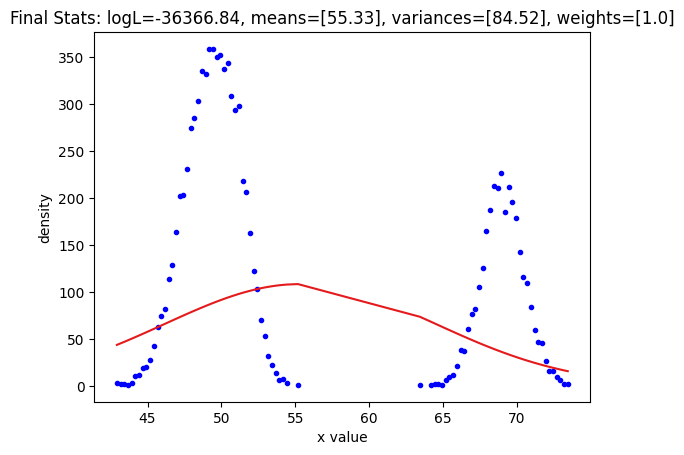

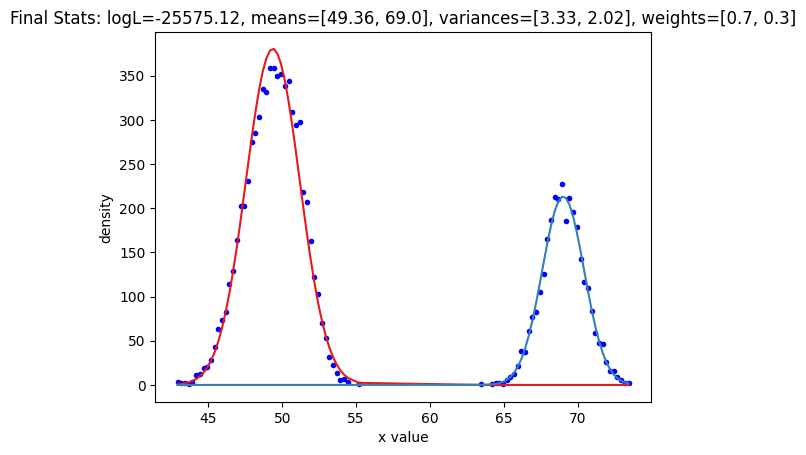

/Users/vivian/sv_gmm/em.py:319: UserWarning: Maximum number of iterations reached without logL convergence
  


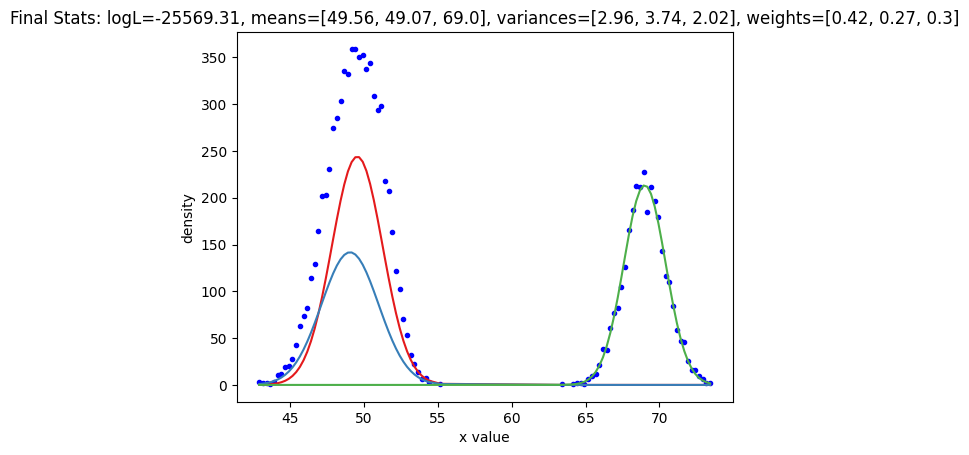


Number of SVs: 3
logL=-25569.31, means=[49.56, 49.07, 69.0], variances=[2.96, 3.74, 2.02], weights=[0.42, 0.27, 0.3]


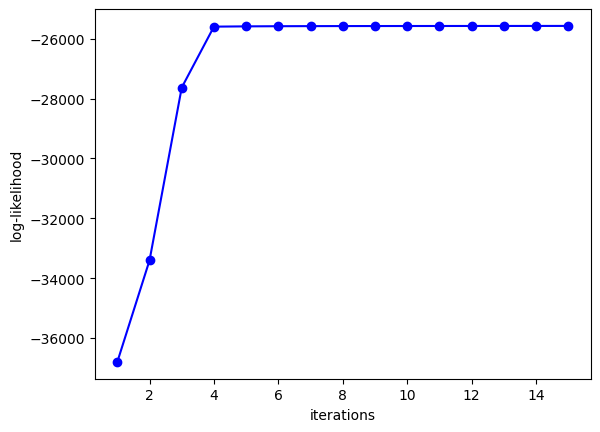

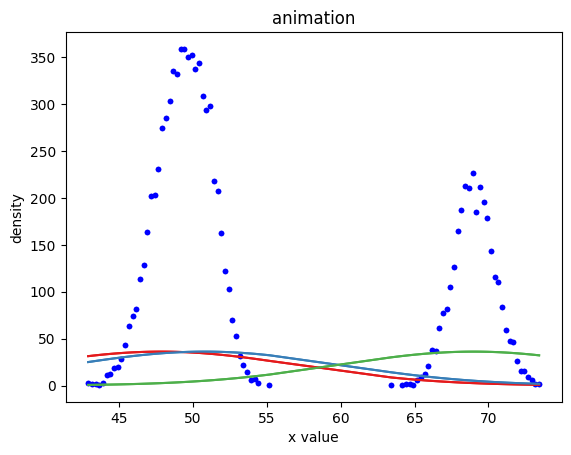

In [54]:
"""
2. Estimate the parameters via EM
"""

run_gmm(x3_random)

In [31]:
threshold_mu = 1 # values between 0 and 100
threshold_vr = 0.5 # values between 1 and 5
threshold_p = 0.05 # values between 0.1 and 0.9

sample_sizes = [20, 100, 1000, 10000]
num_tests_per_sample = 100

for num_samples in sample_sizes:
  passed_tests = []
  failed_tests = []
  for num_modes in range(1, 4):
    for _ in range(num_tests_per_sample):
      data = generate_data(num_samples, num_modes=num_modes, pr=False)
      gmm = run_gmm(data.x, plot=False, pr=False)
      passed = True
      for actual_vals, estimated_vals, threshold in zip([data.mu, data.vr, data.p], [gmm.mu, gmm.vr, gmm.p], [threshold_mu, threshold_vr, threshold_p]):
        for actual_val, estimated_val in zip(actual_vals, estimated_vals):
          if abs(actual_val - estimated_val) >= threshold:
            # print(num_samples, data.mu, gmm.mu, data.vr, gmm.vr, data.p, gmm.p)
            failed_tests.append(data)
            passed = False
            break
        if not passed:
          break
      if passed:
        passed_tests.append(data)

  print(f"{len(failed_tests)}/{3 * num_tests_per_sample} tests failed for data with {num_samples} samples.")

/Users/vivian/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/vivian/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/vivian/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/vivian/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/vivian/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


262/300 tests failed for data with 20 samples. 
196/300 tests failed for data with 100 samples. 
112/300 tests failed for data with 1000 samples. 
71/300 tests failed for data with 10000 samples. 
